# Drexel University
## College of Computing and Informatics
## INFO 212: Data Science Programming I
## Assignment 3
### Due Date: Sunday, Jun 1st, 2025
### This assignment counts for 15% of the final grade

### A. Assignment Overview
This assignment provides the opportunity for you to practice with Python data analysis skills.

### B. What to Hand In

Sumbit a completed this Jupyter notebook.

### C. How to Hand In

Submit your Jupyter notebook file through the course website in the Blackboard Learn system.

### D. When to Hand In

1. Submit your assignment no later than 11:59pm in the due date.
2. There will be a 10% (absolute value) deduction for each day of lateness, to a maximum of 3 days; assignments will not be accepted beyond that point. Missing work will earn a zero grade.

### E. Written Presentation Requirements (if applicable)
Images must be clear and legible. Assignments will be judged on the basis of visual appearance, grammatical correctness, and quality of writing, as well as their contents. Please make sure that the text of your assignments is well-structured, using paragraphs, full sentences, and other features of well-written presentation.


# Your Name: Arielle Madeam

## Question 1 [20 marks]: Wikipedia has a Webpage: [List of countries by past and future population](https://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population). On this page, there are three tables containing the estimated populations from 1950 to 2050 for all the countries. Read the description on the Webpage to understand the information in the tables. Write Python code to use `requests` to read in the tables. Write programs to answer the following questions.
1. How many tables have you read in? List the columns of the DataFrames that contain the population data.
2.For each population DataFrame, rename the column names of average annual growth to meaningful and unique names.
3. Create a DataFrame containing all the data from the population tables. i.e., the DataFrame contains the popultation and average annual growth data from 1950-2050. You need to combine the three population tables. How many rows and columns in the final combined DataFrame?
4. For the top 10 most populous countries at 1950, plot their population data from 1950-2050 (in 5-year interval). The plot should use years 1950-2050 as x axis, and population numbers as y axis. The following figure shows the expected result.
5. For the same top 10 most populous contries at 1950, plot the average annual growth for each previous five-year period starting from 1955 to 2050 in 5-year interval. The following figure shows the expected result.
6. Map country names to their continents and add a 'continent' column storing the continent names corresponding to the countries. Plot the mean population and average annual growth over the years (1950-2050) for all continents.
7. What are the top 5 countries with the highest population growth rate from 1950 to 2020? How does this compare to their projected growth rates from 2020 to 2050? Discuss any notable differences and other factors that should be also considered together with the historical growth data to predict future population changes.

## Answers:

In [1]:
pip install pycountry-convert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 17.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from functools import reduce
from collections import Counter
import seaborn as sns

import pycountry
import pycountry_convert as pc
import numpy as np

1. How many tables have you read in? List the columns of the DataFrames that contain the population data.


In [3]:
# URL for the UN population table page
url = "https://en.wikipedia.org/wiki/List_of_countries_by_past_and_projected_future_population"

# read the tables in  all tables
tables = pd.read_html(url)
print(f"Total tables read: {len(tables)}")

for idx, table in enumerate(tables):
    print(f"\nTable {idx} columns:\n{table.columns}")

Total tables read: 5

Table 0 columns:
Index(['Country (or dependent territory)', '2024', '2030', '2050', '2100'], dtype='object')

Table 1 columns:
Index(['Country (or dependent territory)', '1950', '1955', '%', '1960', '%.1',
       '1965', '%.2', '1970', '%.3', '1975', '%.4', '1980', '%.5'],
      dtype='object')

Table 2 columns:
Index(['Country (or dependent territory)', '1985', '%', '1990', '%.1', '1995',
       '%.2', '2000', '%.3', '2005', '%.4', '2010', '%.5', '2015', '%.6'],
      dtype='object')

Table 3 columns:
Index(['Country (or dependent territory)', '2020', '%', '2025', '%.1', '2030',
       '%.2', '2035', '%.3', '2040', '%.4', '2045', '%.5', '2050', '%.6'],
      dtype='object')

Table 4 columns:
Index(['vteLists of countries by population statistics', 'vteLists of countries by population statistics.1'], dtype='object')


For each population DataFrame, rename the column names of average annual growth to meaningful and unique names.

In [4]:
# assign the three population tables
table_1950_to_1980 = tables[1]
table_1985_to_2015 = tables[2]
table_2020_to_2050 = tables[3]

# renaming growth columns
def rename_growth_columns(df, first_year):
    cols = df.columns.tolist()
    growth_cols = [i for i, col in enumerate(cols) if '%' in str(col)]

    # Create a new list of names
    new_cols = []
    growth_index = 0
    for i, col in enumerate(cols):
        if col == 'Country (or dependent territory)':
            new_cols.append('Country')
        elif i in growth_cols:
            new_cols.append(f'Growth_{first_year + 5 * growth_index}')
            growth_index += 1
        else:
            new_cols.append(str(col))

    df.columns = new_cols
    return df

# applying the changes in name to the table
table_1950_to_1980 = rename_growth_columns(table_1950_to_1980, 1955)
table_1985_to_2015 = rename_growth_columns(table_1985_to_2015, 1990)
table_2020_to_2050 = rename_growth_columns(table_2020_to_2050, 2025)

3. Create a DataFrame containing all the data from the population tables. i.e., the DataFrame contains the popultation and average annual growth data from 1950-2050. You need to combine the three population tables. How many rows and columns in the final combined DataFrame?

In [5]:
# tables to join
tables_to_merge = [table_1950_to_1980, table_1985_to_2015, table_2020_to_2050]

# join all tables on 'Country' using an outer join
combined_df = reduce(lambda left, right: pd.merge(left, right, on='Country', how='outer'), tables_to_merge)

# print shape of the combined DataFrame
print(f"Final DataFrame shape: {combined_df.shape}")

Final DataFrame shape: (228, 42)


4. For the top 10 most populous countries at 1950, plot their population data from 1950-2050 (in 5-year interval). The plot should use years 1950-2050 as x axis, and population numbers as y axis. The following figure shows the expected result: ![](https://i.imgur.com/6W9RuZO.png)

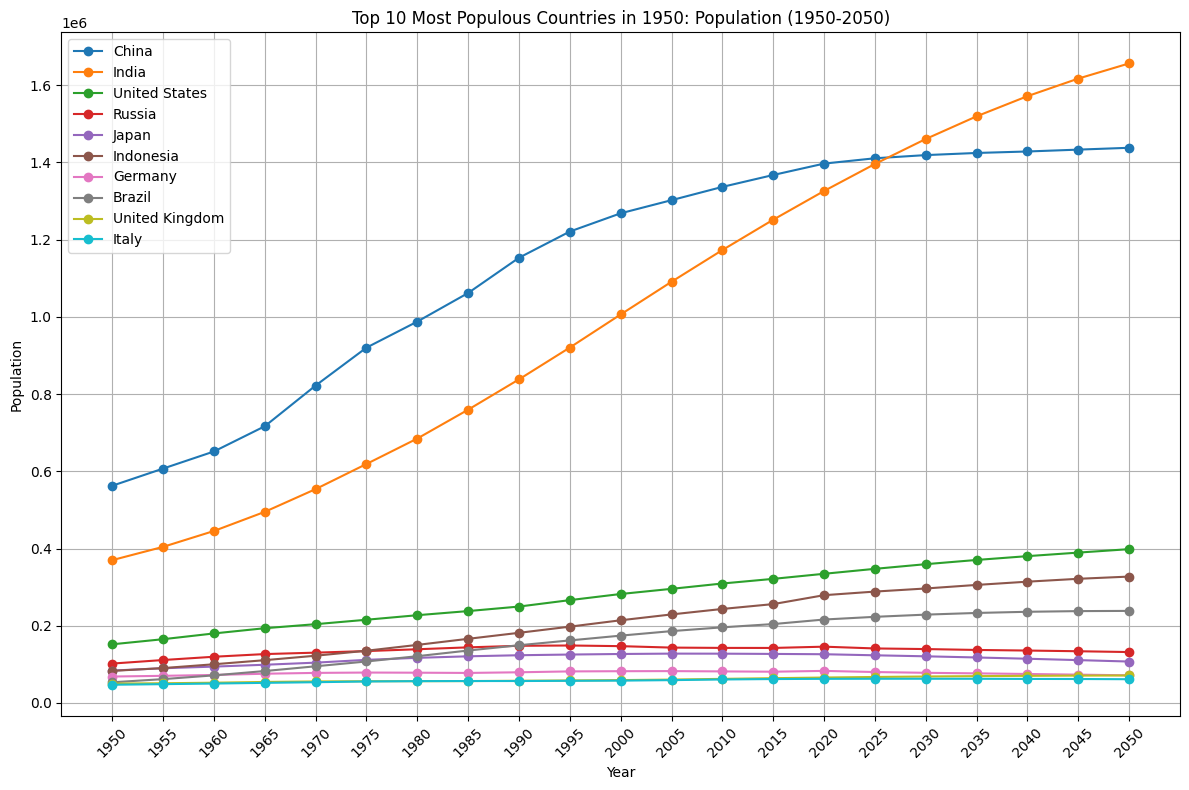

In [6]:
# exlude world
filtered_df = combined_df[combined_df['Country'].str.lower() != 'world']

# identify the population columns
pop_years = list(filter(lambda col: col.isdigit() and 1950 <= int(col) <= 2050, filtered_df.columns))

# find the top 10 countries by population in 1950 and filter data to only include said countries
top10_countries = filtered_df.nlargest(10, '1950')['Country'].tolist()
top10_data = filtered_df[filtered_df['Country'].isin(top10_countries)]

# create plot
plt.figure(figsize=(12, 8))
for country in top10_countries:
    country_row = top10_data[top10_data['Country'] == country]
    populations = country_row[pop_years].values.flatten()
    populations = [float(x) if pd.notna(x) else None for x in populations]
    plt.plot(pop_years, populations, marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Top 10 Most Populous Countries in 1950: Population (1950-2050)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()





---



5. For the same top 10 most populous contries at 1950, plot the average annual growth for each previous five-year period starting from 1955 to 2050 in 5-year interval. The following figure shows the expected result: ![](https://i.imgur.com/ImXjIo0.png)

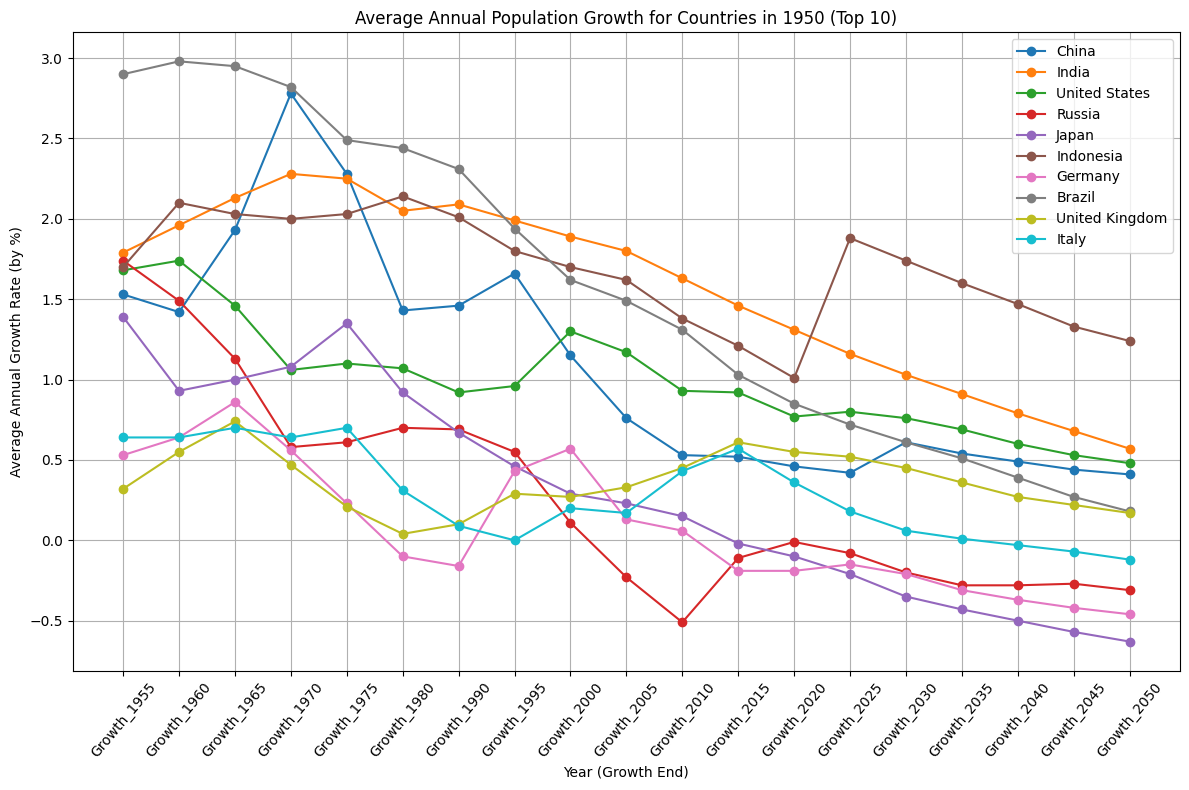

In [7]:
# extract growth columns from combined_df
growth_cols = [col for col in filtered_df.columns if col.startswith('Growth_')]
growth_years = [int(col.split('_')[1]) for col in growth_cols]
growth_cols_filtered = [col for col, year in zip(growth_cols, growth_years) if 1955 <= year <= 2050]

# filter data for top 10 countries only
top10_growth_data = filtered_df[filtered_df['Country'].isin(top10_countries)]

# create plot
plt.figure(figsize=(12, 8))
for country in top10_countries:
    country_row = top10_growth_data[top10_growth_data['Country'] == country]
    growth_values = country_row[growth_cols_filtered].values.flatten()
    growth_values = [float(x) if pd.notna(x) else None for x in growth_values]
    plt.plot(growth_cols_filtered, growth_values, marker='o', label=country)

plt.xlabel('Year (Growth End)')
plt.ylabel('Average Annual Growth Rate (by %)')
plt.title('Average Annual Population Growth for Countries in 1950 (Top 10)')
plt.xticks(rotation=50)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


6. Map country names to their continents and add a 'continent' column storing the continent names corresponding to the countries. Plot the mean population and average annual growth over the years (1950-2050) for all continents.
- Hint: install the pycountry_convert package and use its methods for converting country names to continent names: https://pypi.org/project/pycountry-convert/

<ipython-input-8-4d096b420111>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['continent'] = filtered_df['Country'].apply(map_country_to_continent)


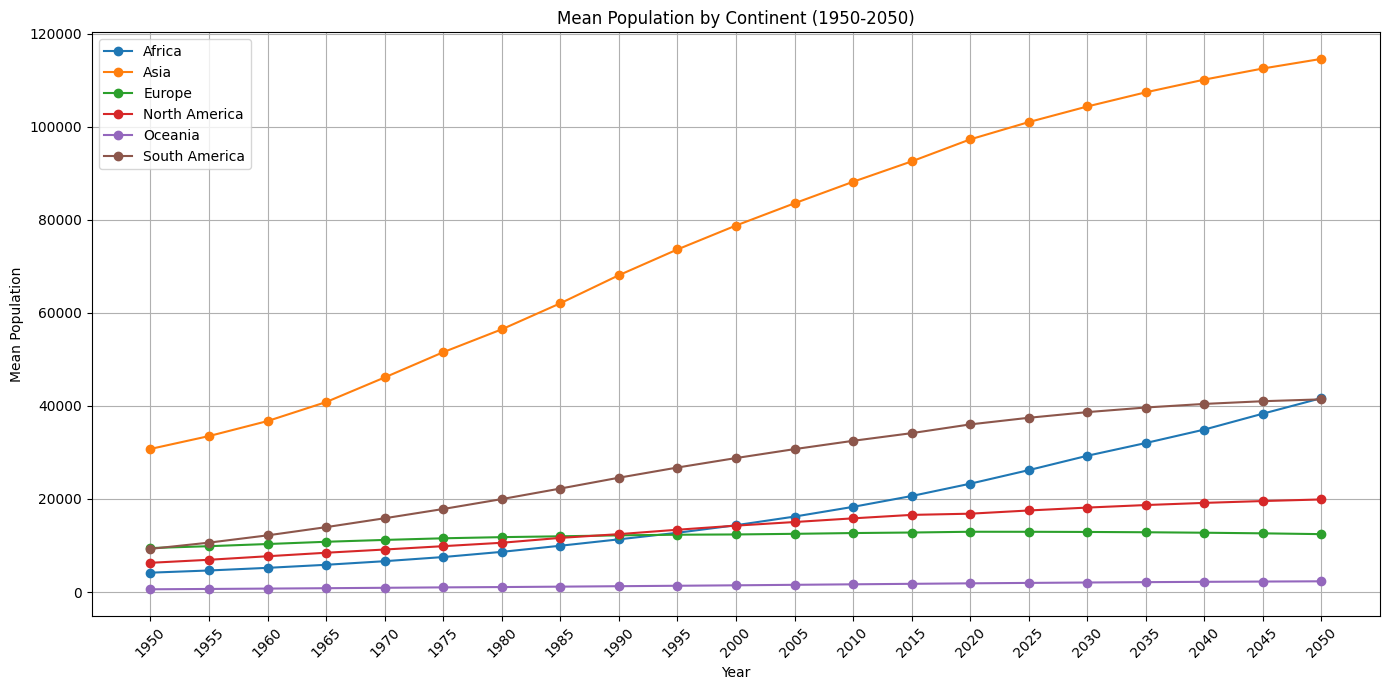

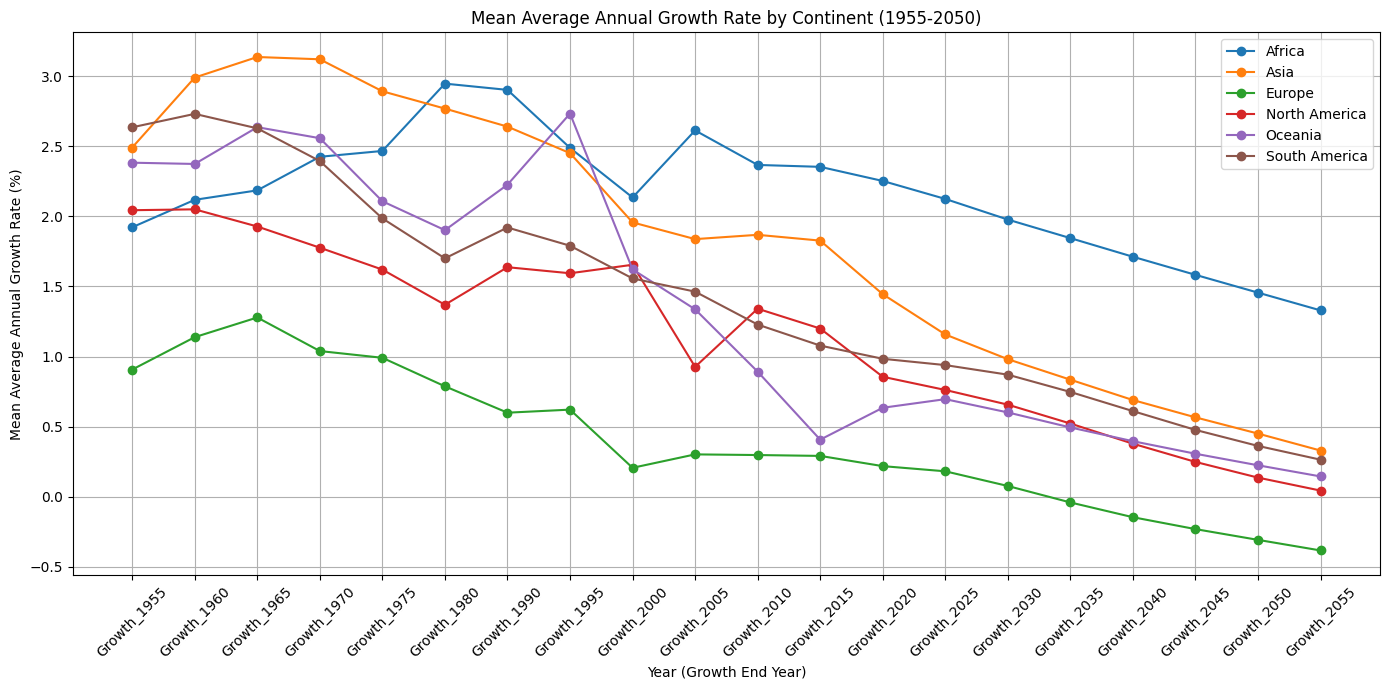

In [8]:
# function to map the country to the continent
def map_country_to_continent(country_name):
    try:
        country = pycountry.countries.lookup(country_name)
        country_code = country.alpha_2
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except Exception:
        return np.nan

# apply mapping to DataFrame
filtered_df['continent'] = filtered_df['Country'].apply(map_country_to_continent)

# manual fix to unmapped countries
continent_fixes = {
    'Brunei': 'Asia',
    'Macau': 'Asia',
    'Timor-Leste': 'Asia',
    'Palestine': 'Asia',
    'Turkey': 'Asia',
    'Cape Verde': 'Africa',
    'Western Sahara': 'Africa',
    'São Tomé and Príncipe': 'Africa',
    'Democratic Republic of the Congo': 'Africa',
    'Ivory Coast': 'Africa',
    'Kosovo': 'Europe',
    'Russia': 'Europe',
    'Saint Martin': 'North America',
    'Sint Maarten': 'North America',
    'United States Virgin Islands': 'North America',
}

# group by continent and compute mean population and growth for each year
mean_pop_by_continent = filtered_df.groupby('continent')[pop_years].mean()
mean_growth_by_continent = filtered_df.groupby('continent')[growth_cols].mean()

# plot mean population and growth rate over years for all continents
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
for continent in mean_pop_by_continent.index:
    plt.plot(pop_years, mean_pop_by_continent.loc[continent], marker='o', label=continent)

plt.xlabel('Year')
plt.ylabel('Mean Population')
plt.title('Mean Population by Continent (1950-2050)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
for continent in mean_growth_by_continent.index:
    plt.plot(growth_cols, mean_growth_by_continent.loc[continent], marker='o', label=continent)

plt.xlabel('Year (Growth End Year)')
plt.ylabel('Mean Average Annual Growth Rate (%)')
plt.title('Mean Average Annual Growth Rate by Continent (1955-2050)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


7. What are the top 5 countries with the highest population growth rate from 1950 to 2020? How does this compare to their projected growth rates from 2020 to 2050? Discuss any notable differences and other factors that should be also considered together with the historical growth data to predict future population changes.

In [9]:
# select the relevant rows with relevant values for the years 1950, 2020, 2050
growth_df = (
    filtered_df
    .dropna(subset=['1950', '2020', '2050'])
    .copy()
)

# make sure columns are numeric
for year in ['1950', '2020', '2050']:
    growth_df[year] = pd.to_numeric(growth_df[year], errors='coerce')

# compute growth percentage
growth_df = growth_df.assign(
    **{
        'Growth_1950_2020_%': ((growth_df['2020'] - growth_df['1950']) / growth_df['1950']) * 100,
        'Growth_2020_2050_%': ((growth_df['2050'] - growth_df['2020']) / growth_df['2020']) * 100
    }
)

# get top 5 countries by historical growth
top5_growth = growth_df.sort_values(by='Growth_1950_2020_%', ascending=False).head(5)

# display the relevant columns
print(top5_growth[['Country', '1950', '2020', '2050', 'Growth_1950_2020_%', 'Growth_2020_2050_%']])



                  Country  1950  2020  2050  Growth_1950_2020_%  \
162                 Qatar    26  2445  2559         9303.846154   
213  United Arab Emirates    72  6496  8019         8922.222222   
223        Western Sahara    10   653  1174         6430.000000   
107                Kuwait   145  2994  3864         1964.827586   
182          Sint Maarten     3    44    54         1366.666667   

     Growth_2020_2050_%  
162            4.662577  
213           23.445197  
223           79.785605  
107           29.058116  
182           22.727273  


**The countries that have the highest population growth from 1950 to 2020 are Qatar, the United Arab Emirates, Western Sahara, Kuwait, and Sint Maarten. Qatar has the most growth with the largest rate of approximately 9304%, followed by the UAE at 8922%. Western Sahara, Kuwait, and Sint Maarten also showed pretty massive growth rates of 6430%, 1965%, and 1367%, respectively. These numbers may seem grossly inflated, but it is to mention that the starting population was in the low tens of thousands while the final count is in the low millions. A large factor of this growth, at least with countries like Qatar, the UAE, and Kuwait, could be due to economic growth from things like oil and tourism. Looking forward, the projected growth rates from 2020 to 2050 for these countries seem to slow down dramatically, Qatar’s dropping to around 4.7% while Western Sahara is projected to continue growing at nearly 80%. The UAE, Kuwait, and Sint Maarten are also projected to see moderate population increases ranging from 22% to 29%. I believe this shift is due to economic transitions, as many of these countries are at capacity and do not have the infrastructure or resources for more people.**




## Question 2 [40 marks]: The link: https://yuan-json-api.vercel.app/nobelprize/laureates is a RESTful API endpoint that returns information in JSON about Nobel Prize Laureates. Write Python code to use `requests` to call the RESTful API and read the JSON results. Write program to answer the following questions.
1. Create a Pandas DataFrame containing the laureates information along with the information about their prizes and afflications in flat format. How many unique laureates are in the data set?

2. Develop two distinct methods to identify laureates who have been awarded Nobel prizes more than once, whether in different years or in different categories. Present your findings in a clear and organized manner. This could be displayed in a table format (like a pandas DataFrame).

 - Two separate and distinct approaches could be different algorithmic strategies, Python code, or data structures. For each approach, You need to provide a detailed explanation of the logic behind each method. The explanation should be in the form of comments within your code or as a separate written text accompanying your code.

3. Develop two distinct methods to list the top 5 afiliations by the number of awards. Show the laureates, prizes, and affiliations information. Present your findings in a clear and organized manner. This could be displayed in a table format (like a pandas DataFrame).
 - Two separate and distinct approaches could be using different algorithmic strategies, Python code, or data structures For each approach, you need to provide a detailed explanation of the logic behind each method. The explanation should be in the form of comments within your code or as a separate written text accompanying your code.

4. For the top 5 affiliations, develop two distinct visualizations to represent the counts of each Nobel prize category associated with these affiliations.

 - Two different types of plots could be bar chart, pie chart, line graph, etc. You also could choose to present the information in a single comprehensive figure or multiple figures for each affiliation.

## Answers:

1. Create a Pandas DataFrame containing the laureates information along with the information about their prizes and afflications in flat format. How many unique laureates are in the data set?

In [35]:
# Step 1: Fetch data
url = "https://yuan-json-api.vercel.app/nobelprize/laureates"
response = requests.get(url)
data = response.json()

# Step 2: Flatten the structure
laureates_data = []

for laureate in data['laureates']:
    if 'prizes' in laureate:
        for prize in laureate['prizes']:
            affiliations = prize.get("affiliations", [{}])

            # Handle nested list edge case
            if isinstance(affiliations, list):
                for aff in affiliations:
                    # Skip if it's a nested list instead of dict
                    if isinstance(aff, dict):
                        laureates_data.append({
                            "id": laureate.get("id"),
                            "firstname": laureate.get("firstname"),
                            "surname": laureate.get("surname"),
                            "gender": laureate.get("gender"),
                            "born": laureate.get("born"),
                            "bornCountry": laureate.get("bornCountry"),
                            "category": prize.get("category"),
                            "year": prize.get("year"),
                            "affiliation_name": aff.get("name"),
                            "affiliation_city": aff.get("city"),
                            "affiliation_country": aff.get("country")
                        })
            else:
                laureates_data.append({
                    "id": laureate.get("id"),
                    "firstname": laureate.get("firstname"),
                    "surname": laureate.get("surname"),
                    "gender": laureate.get("gender"),
                    "born": laureate.get("born"),
                    "bornCountry": laureate.get("bornCountry"),
                    "category": prize.get("category"),
                    "year": prize.get("year"),
                    "affiliation_name": None,
                    "affiliation_city": None,
                    "affiliation_country": None
                })

# Step 3: Convert to DataFrame
df = pd.DataFrame(laureates_data)
print(df.head())

  id       firstname    surname gender        born            bornCountry  \
0  1  Wilhelm Conrad    Röntgen   male  1845-03-27  Prussia (now Germany)   
1  2  Hendrik Antoon    Lorentz   male  1853-07-18        the Netherlands   
2  3          Pieter     Zeeman   male  1865-05-25        the Netherlands   
3  4   Antoine Henri  Becquerel   male  1852-12-15                 France   
4  5          Pierre      Curie   male  1859-05-15                 France   

  category  year                                   affiliation_name  \
0  physics  1901                                  Munich University   
1  physics  1902                                  Leiden University   
2  physics  1902                               Amsterdam University   
3  physics  1903                                École Polytechnique   
4  physics  1903  École municipale de physique et de chimie indu...   

  affiliation_city affiliation_country  
0           Munich             Germany  
1           Leiden     the N

2. Develop two distinct methods to identify laureates who have been awarded Nobel prizes more than once, whether in different years or in different categories. Present your findings in a clear and organized manner. This could be displayed in a table format (like a pandas DataFrame).

 - Two separate and distinct approaches could be different algorithmic strategies, Python code, or data structures. For each approach, You need to provide a detailed explanation of the logic behind each method. The explanation should be in the form of comments within your code or as a separate written text accompanying your code.


**Method 1 - GroupBy and Filter - Group by laureate_id to group all prizes won and then filter the groups where more than one prize is won. Drop any duplicate prize rows**

In [36]:
# indentify winners of multiple awards using transofrm to count occurrences
multi_award_winners_1 = df[df.groupby('id')['id'].transform('count') > 1]

# select relevant columns and remove duplicates
multi_award_winners_1 = multi_award_winners_1[['id', 'firstname', 'surname', 'year', 'category']].drop_duplicates()

print("\nMulti-award Nobel laureates")
print(multi_award_winners_1)




Multi-award Nobel laureates
      id          firstname  surname  year   category
52    54             Hideki   Yukawa  1949    physics
61    62            Walther    Bothe  1954    physics
66    66               John  Bardeen  1956    physics
67    66               John  Bardeen  1972    physics
72    71  Igor Yevgenyevich     Tamm  1958    physics
..   ...                ...      ...   ...        ...
714  922               Paul  Modrich  2015  chemistry
728  939            Michael  Rosbash  2017   medicine
731  941             Rainer    Weiss  2017    physics
733  942           Barry C.   Barish  2017    physics
735  943             Kip S.   Thorne  2017    physics

[67 rows x 5 columns]


**Method 2 - Value Counts and Boolean Indexing - count number of prize entries per laureate id and extract ids with count > 1 and then filter the DataFrame by said ids. Drop any duplicate prize rows.**

In [37]:
# count the amount of times each ID appears in the data and filter to keep only those who appear more than once
multi_ids = df['id'].value_counts()
multi_ids = multi_ids[multi_ids > 1].index

# filter the og DataFrame to include only rows with those IDs and remove any duplicate rows
multi_award_winners_2 = df[df['id'].isin(multi_ids)]
multi_award_winners_2 = multi_award_winners_2[['id', 'firstname', 'surname', 'year', 'category']].drop_duplicates()

# print results
print("\nMulti-award Nobel laureates")
print(multi_award_winners_2)



Multi-award Nobel laureates
      id          firstname  surname  year   category
52    54             Hideki   Yukawa  1949    physics
61    62            Walther    Bothe  1954    physics
66    66               John  Bardeen  1956    physics
67    66               John  Bardeen  1972    physics
72    71  Igor Yevgenyevich     Tamm  1958    physics
..   ...                ...      ...   ...        ...
714  922               Paul  Modrich  2015  chemistry
728  939            Michael  Rosbash  2017   medicine
731  941             Rainer    Weiss  2017    physics
733  942           Barry C.   Barish  2017    physics
735  943             Kip S.   Thorne  2017    physics

[67 rows x 5 columns]


3. Develop two distinct methods to list the top 5 afiliations by the number of awards. Show the laureates, prizes, and affiliations information. Present your findings in a clear and organized manner. This could be displayed in a table format (like a pandas DataFrame).
 - Two separate and distinct approaches could be using different algorithmic strategies, Python code, or data structures For each approach, you need to provide a detailed explanation of the logic behind each method. The explanation should be in the form of comments within your code or as a separate written text accompanying your code.

**Method 1: Groupby + size() + filtering - group the df by affiliation name to count how many prizes each affiliation has and then sort these counts in descending order to find the top 5 affiliations. Filter original DataFrame to only those top 5 affiliations and finally show relevant columns w/ prize and laureate info.**

In [42]:
# group and filter to find top 5
affil_count = df.groupby('affiliation_name').size().sort_values(ascending=False)
top5_affil = affil_count.head(5).index.tolist()

# sorting the values
top5_df_1 = df[df['affiliation_name'].isin(top5_affil)][
    ['affiliation_name', 'id', 'firstname', 'surname', 'year', 'category']
].sort_values(['affiliation_name', 'year'])

# print method 1
print("Top 5 affiliations by number of awards with laureates and prizes")
print(top5_df_1)

Method 1: Top 5 affiliations by number of awards with laureates and prizes
                                 affiliation_name   id       firstname  \
26   California Institute of Technology (Caltech)   28  Robert Andrews   
339  California Institute of Technology (Caltech)  325     Thomas Hunt   
41   California Institute of Technology (Caltech)   43      Carl David   
226  California Institute of Technology (Caltech)  217      Linus Carl   
383  California Institute of Technology (Caltech)  364    George Wells   
..                                            ...  ...             ...   
539                         University of Chicago  732        James J.   
616                         University of Chicago  822        Roger B.   
692                         University of Chicago  894       Eugene F.   
693                         University of Chicago  895      Lars Peter   
740                         University of Chicago  949      Richard H.   

      surname  year   category  
26 

**Method 2: Counter on affiliation_name - Convert 'affiliation_name' column to a list and then use the counter to count frequency of each affiliation. Extract top 5 affiliations by most common and then display laureates and prize info.**


In [43]:
# list and init counter for counting frequency
affil_list = df['affiliation_name'].tolist()
affil_counter = Counter(affil_list)

# finding 5 most common affiliations
top5_affil_2 = [name for name, count in affil_counter.most_common(5)]

# sorting the values
top5_df_2 = df[df['affiliation_name'].isin(top5_affil_2)][
    ['affiliation_name', 'id', 'firstname', 'surname', 'year', 'category']
].sort_values(['affiliation_name', 'year'])

# printing method 2
print("Top 5 affiliations by number of awards with laureates and prizes")
print(top5_df_2)


Top 5 affiliations by number of awards with laureates and prizes
                                 affiliation_name   id       firstname  \
26   California Institute of Technology (Caltech)   28  Robert Andrews   
339  California Institute of Technology (Caltech)  325     Thomas Hunt   
41   California Institute of Technology (Caltech)   43      Carl David   
226  California Institute of Technology (Caltech)  217      Linus Carl   
383  California Institute of Technology (Caltech)  364    George Wells   
..                                            ...  ...             ...   
539                         University of Chicago  732        James J.   
616                         University of Chicago  822        Roger B.   
692                         University of Chicago  894       Eugene F.   
693                         University of Chicago  895      Lars Peter   
740                         University of Chicago  949      Richard H.   

      surname  year   category  
26   Millikan

4. For the top 5 affiliations, develop two distinct visualizations to represent the counts of each Nobel prize category associated with these affiliations.

 - Two different types of plots could be bar chart, pie chart, line graph, etc. You also could choose to present the information in a single comprehensive figure or multiple figures for each affiliation.

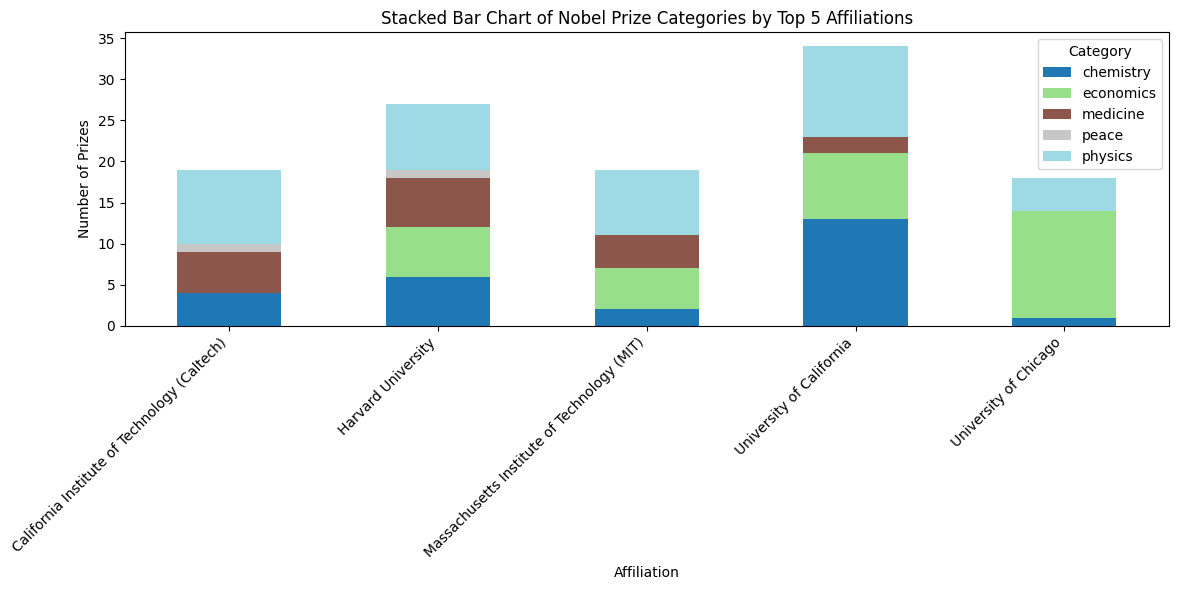

In [69]:
# group by affiliation and category, count occurrences
counts = top5_df_1.groupby(['affiliation_name', 'category']).size().reset_index(name='count')

# pivot the table so affiliations are rows and categories are columns, fill missing with 0
counts_pivot = counts.pivot(index='affiliation_name', columns='category', values='count').fillna(0)

# plot stacked bar chart
counts_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Stacked Bar Chart of Nobel Prize Categories by Top 5 Affiliations')
plt.xlabel('Affiliation')
plt.ylabel('Number of Prizes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category')
plt.tight_layout()
plt.show()




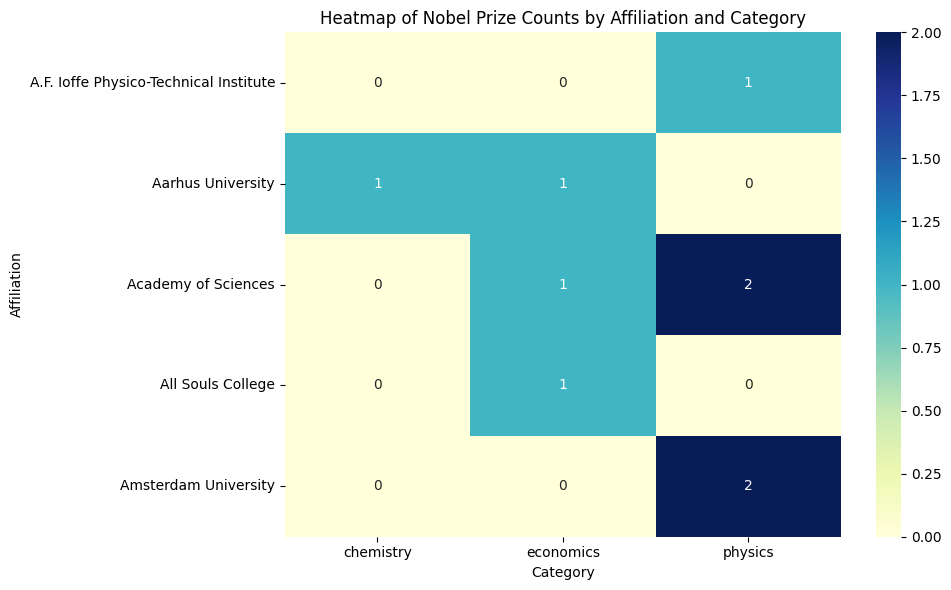

In [16]:
# create and plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(counts_pivot, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Heatmap of Nobel Prize Counts by Affiliation and Category')
plt.xlabel('Category')
plt.ylabel('Affiliation')
plt.tight_layout()
plt.show()


## Question 3 [20 marks]: The file `weather-samples.csv` contains weather data measured at a weather station for a period of three years. Sensors at the weather station capture weather-related measurements such as air temperature, air pressure, and relative humidity. Load  the data to a pandas DataFrame. Write code to answer the following questions.

1. How many rows contain missing values?
2. How many columns contain missing values?
3. List the numbers of missing values for all columns.
4. For each missing value, fill up it with the mean value of the column where the missing value is located in.
5. Show there is no missing value after filling up.
6. Plot the histogram of the value `relative_humidity_3pm`.
7. A weather forecast problem is to predict a measure in a future time using the measurements at earlier moments. For example, the data set contains several measurements at 9am and one measurement `relative_humidity_3pm` at 3pm. It is interesting to know whether we can predict `relative_humidity_3pm` using the values at 9am. This is a typical supervised machine learning problem. Using plots to visualize the relationships between the measurements at 9am and `relative_humidity_3pm`. What do you find? Discuss the impacts of the measurements at 9am to the values of `relaive_humidity_3pm`.

## Answers:

1. How many rows contain missing values?

In [17]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
# load CSV file into a DataFrame
df = pd.read_csv('weather-samples.csv')

In [46]:
# check for null values in each row
rows_with_missing = df.isnull().any(axis=1).sum()

# Print result
print(f"Rows w/ missing values: {rows_with_missing}")

Rows w/ missing values: 31


2. How many columns contain missing values?

In [47]:
# check for null values in each column
cols_with_missing = df.isnull().any(axis=0).sum()

# print
print(f"Number of columns with missing values: {cols_with_missing}")

Number of columns with missing values: 8


3. List the numbers of missing values for all columns.

In [50]:
# show the specififc columns and the amount of missing values in them
missing_per_column = df.isnull().sum()

# print results
print(f"Missing values per column: {missing_per_column}")

Missing values per column: number                    0
air_pressure_9am          3
air_temp_9am              5
avg_wind_direction_9am    4
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation_9am     6
rain_duration_9am         3
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64


4. For each missing value, fill up it with the mean value of the column where the missing value is located in.

In [51]:
# fill missing values
df_filled = df.fillna(df.mean())

5. Show there is no missing value after filling up.

In [53]:
# show all missing values are zero
print(f"Missing values after filling: {df_filled.isnull().sum()}")

Missing values after filling: number                    0
air_pressure_9am          0
air_temp_9am              0
avg_wind_direction_9am    0
avg_wind_speed_9am        0
max_wind_direction_9am    0
max_wind_speed_9am        0
rain_accumulation_9am     0
rain_duration_9am         0
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64


6. Plot the histogram of the value `relative_humidity_3pm`.

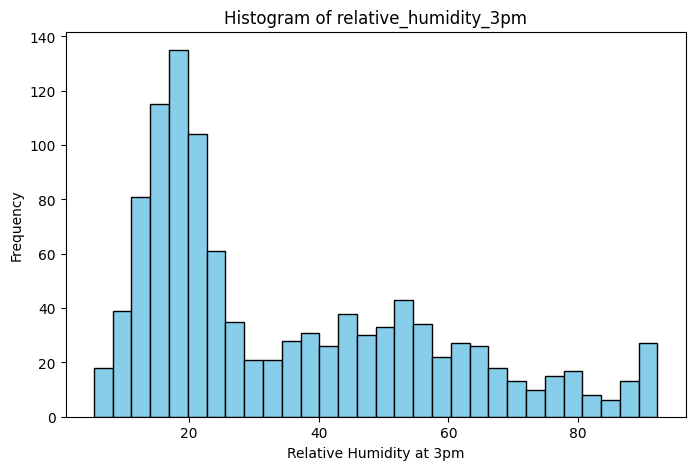

In [54]:
# show plot for relative 3pm humidity
plt.figure(figsize=(8,5))
plt.hist(df_filled['relative_humidity_3pm'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of relative_humidity_3pm')
plt.xlabel('Relative Humidity at 3pm')
plt.ylabel('Frequency')
plt.show()


7. A weather forecast problem is to predict a measure in a future time using the measurements at earlier moments. For example, the data set contains several measurements at 9am and one measurement `relative_humidity_3pm` at 3pm. It is interesting to know whether we can predict `relative_humidity_3pm` using the values at 9am. This is a typical supervised machine learning problem. Using plots to visualize the relationships between the measurements at 9am and `relative_humidity_3pm`. What do you find? Discuss the impacts of the measurements at 9am to the values of `relaive_humidity_3pm`.

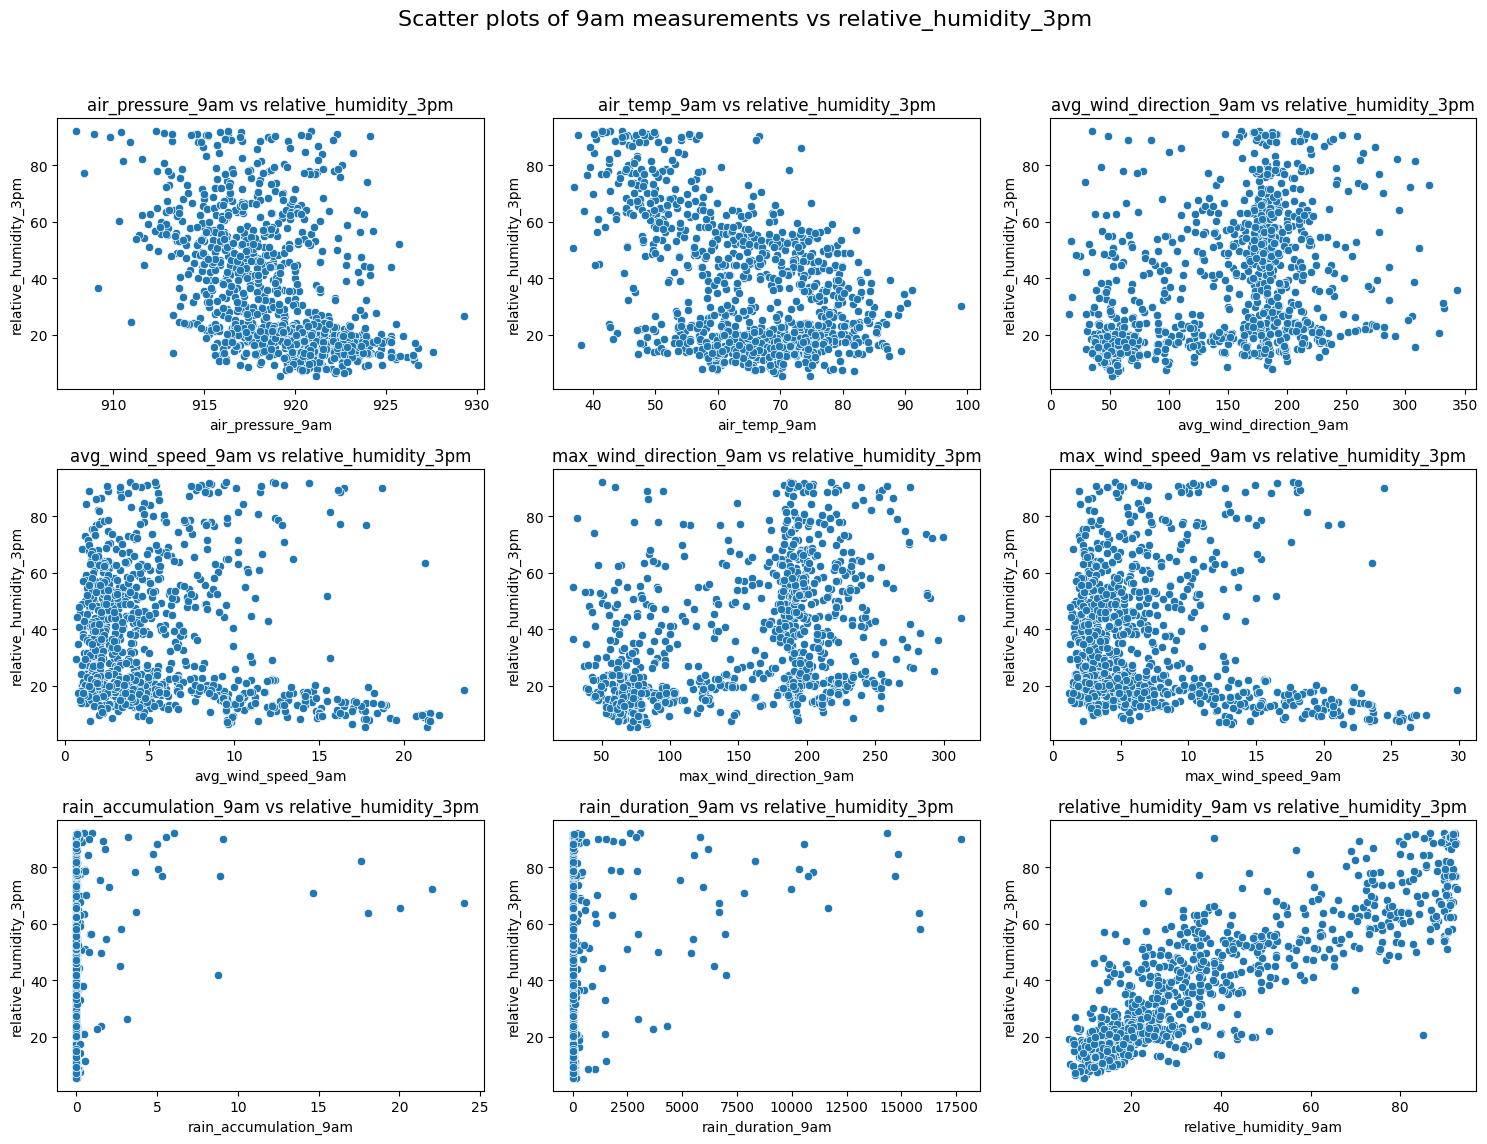

In [56]:
# select relevant columns measured at 9am and the target column
cols_9am = [col for col in df.columns if '9am' in col]
target_col = 'relative_humidity_3pm'

# 3x3 subplot grid
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Scatter plots of 9am measurements vs relative_humidity_3pm', fontsize=16)

# flatten the axes array
axes = axes.flatten()

# loop through each 9am column and plot
for i, col in enumerate(cols_9am):
    sns.scatterplot(data=df_filled, x=col, y=target_col, ax=axes[i])
    axes[i].set_title(f'{col} vs {target_col}')

# adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**The scatter plots reveal several key patterns and relationships between the 9 am weather measurements and the relative humidity at 3 pm. One notable pattern is the strong negative correlation between the air temperature at 9 am and afternoon humidity. This means that a warmer morning temperature indicates lower afternoon humidity. Another pattern is the strong positive correlation between morning relative humidity and afternoon values, although this relationship includes some variability due to notable scatter. Additionally, air pressure shows a clear negative relationship, with higher morning pressure typically leading to lower relative humidity at 3 pm.**

**Moderate relationships exist between wind speed and afternoon humidity, with both average and maximum wind speeds exhibiting negative correlations. This indicates enhanced evaporation and atmospheric mixing due to stronger winds. From a predictive modeling standpoint, temperature emerges as the strongest single predictor, owing to its close association with humidity. However, a more robust model would incorporate multiple features, such as pressure, morning humidity, and wind metrics. Considering the presence of non-linear patterns in several plots, machine learning models capable of capturing these complexities like random forests  are likely to outperform simple linear regression model.**

## Question 4 [20 marks]: Download the dataset: `activity-data.csv` and load it into a data frame. The data set contains the time series outputs of a wearable clinical device measuring a patient's activities. Write code to answer the following questions:
1. What is the total number of days covered by the dataset? Provide a list of all the distinct calendar dates on which recordings were made.
2. Can you plot the number of steps against the recording 'Datetime', ensuring that each tick on the x-axis corresponds to a unique date in the dataset?
3. Create a plot that shows the daily average number of steps in comparison with the steps recorded each minute. The plot should clearly differentiate between the daily mean and individual minute measurements.
4. How does the average step count change during 15-minute intervals throughout the day? Compute and plot these averages across all days in the dataset.
5. For each day represented in the dataset, what is the percentage of minutes without records (missing records)? Please calculate and present this data
6. For minutes with missing data, fill in 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories' using the mean values for those minutes across all days where data is available. Save the completed dataset to a DataFrame named `all_activity_df` with columns for 'Datetime', 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories'.
7. Could you create plots that illustrate the pairwise relationships between 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories'? After analyzing these plots, what conclusions can you draw about the relationships and potential correlations between these variables?

## Answers:

1. What is the total number of days covered by the dataset? Provide a list of all the distinct calendar dates on which recordings were made.

In [57]:
# Load the dataset
df = pd.read_csv("activity-data.csv", parse_dates=['Datetime'])

In [58]:
# extract dates from df
df['Date'] = df['Datetime'].dt.date

# find the dates
unique_dates = df['Date'].unique()
total_days = len(unique_dates)

# print total number of days and unique days
print("Total number of days:", total_days)
print("List of unique dates:")
print(unique_dates)

Total number of days: 23
List of unique dates:
[datetime.date(2016, 6, 22) datetime.date(2016, 6, 23)
 datetime.date(2016, 6, 24) datetime.date(2016, 6, 25)
 datetime.date(2016, 6, 26) datetime.date(2016, 6, 27)
 datetime.date(2016, 6, 28) datetime.date(2016, 6, 29)
 datetime.date(2016, 6, 30) datetime.date(2016, 7, 1)
 datetime.date(2016, 7, 2) datetime.date(2016, 7, 3)
 datetime.date(2016, 7, 4) datetime.date(2016, 7, 5)
 datetime.date(2016, 7, 6) datetime.date(2016, 7, 7)
 datetime.date(2016, 7, 8) datetime.date(2016, 7, 9)
 datetime.date(2016, 7, 10) datetime.date(2016, 7, 11)
 datetime.date(2016, 7, 12) datetime.date(2016, 7, 13)
 datetime.date(2016, 7, 14)]


2. Can you plot the number of steps against the recording 'Datetime', ensuring that each tick on the x-axis corresponds to a unique date in the dataset?


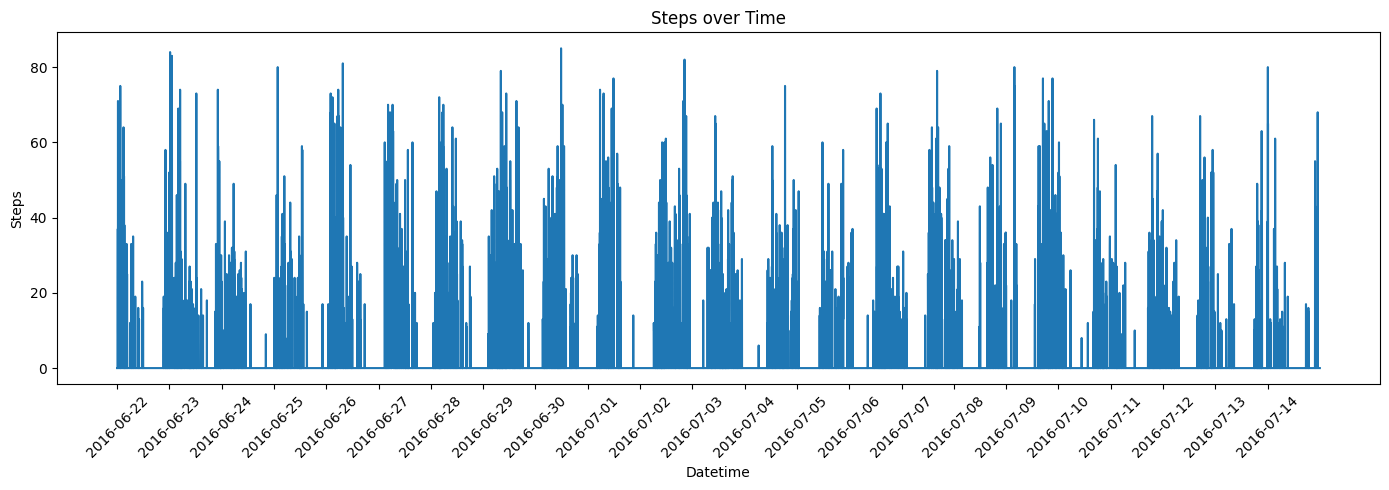

In [67]:
# create steps over time plot
plt.figure(figsize=(14, 5))
plt.plot(df['Datetime'], df['Steps'], label='Steps')
plt.xlabel('Datetime')
plt.ylabel('Steps')
plt.title('Steps over Time')
plt.xticks(rotation=90)

# make x-axis ticks to be one tick per day
unique_times = df['Date'].unique()
plt.xticks(ticks=df[df['Date'].isin(unique_times)]['Datetime'][::len(df)//len(unique_times)],
           labels=unique_times, rotation=45)

plt.tight_layout()
plt.show()


3. Create a plot that shows the daily average number of steps in comparison with the steps recorded each minute. The plot should clearly differentiate between the daily mean and individual minute measurements.

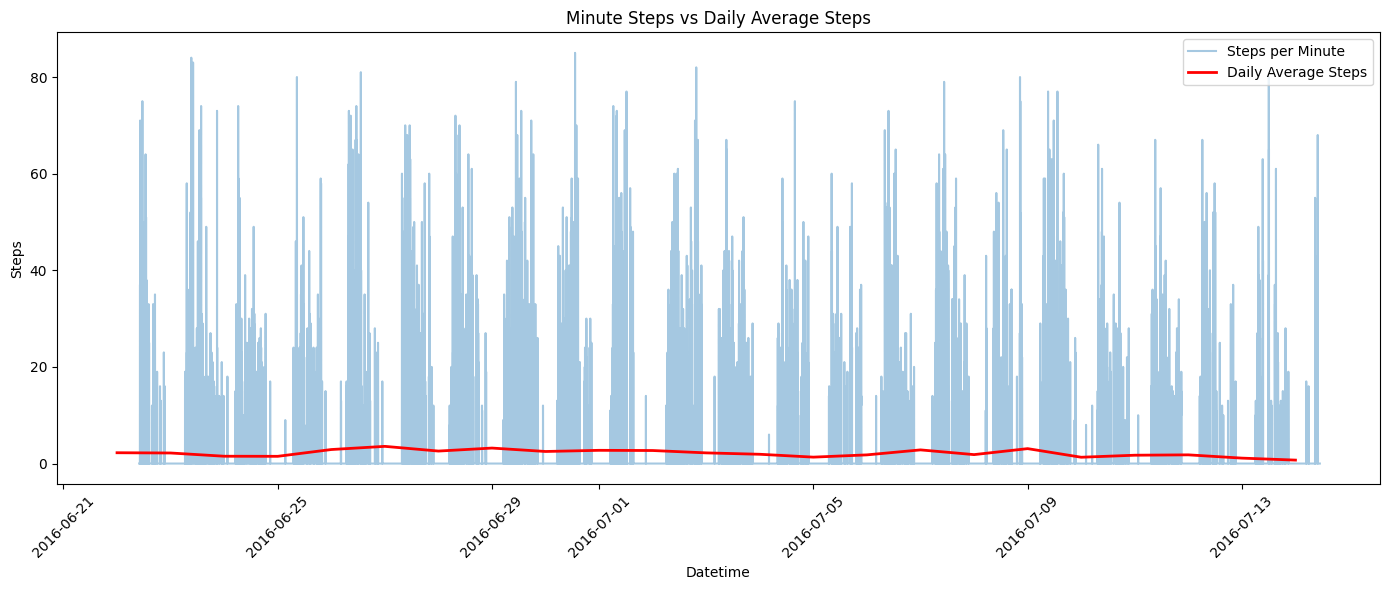

In [61]:
# find daily mean
daily_avg = df.groupby('Date')['Steps'].mean()

# create plot
plt.figure(figsize=(14, 6))
plt.plot(df['Datetime'], df['Steps'], label='Steps per Minute', alpha=0.4)
plt.plot(daily_avg.index, daily_avg.values, label='Daily Average Steps', color='red', linewidth=2)
plt.xlabel("Datetime")
plt.ylabel("Steps")
plt.title("Minute Steps vs Daily Average Steps")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


4. How does the average step count change during 15-minute intervals throughout the day? Compute and plot these averages across all days in the dataset.

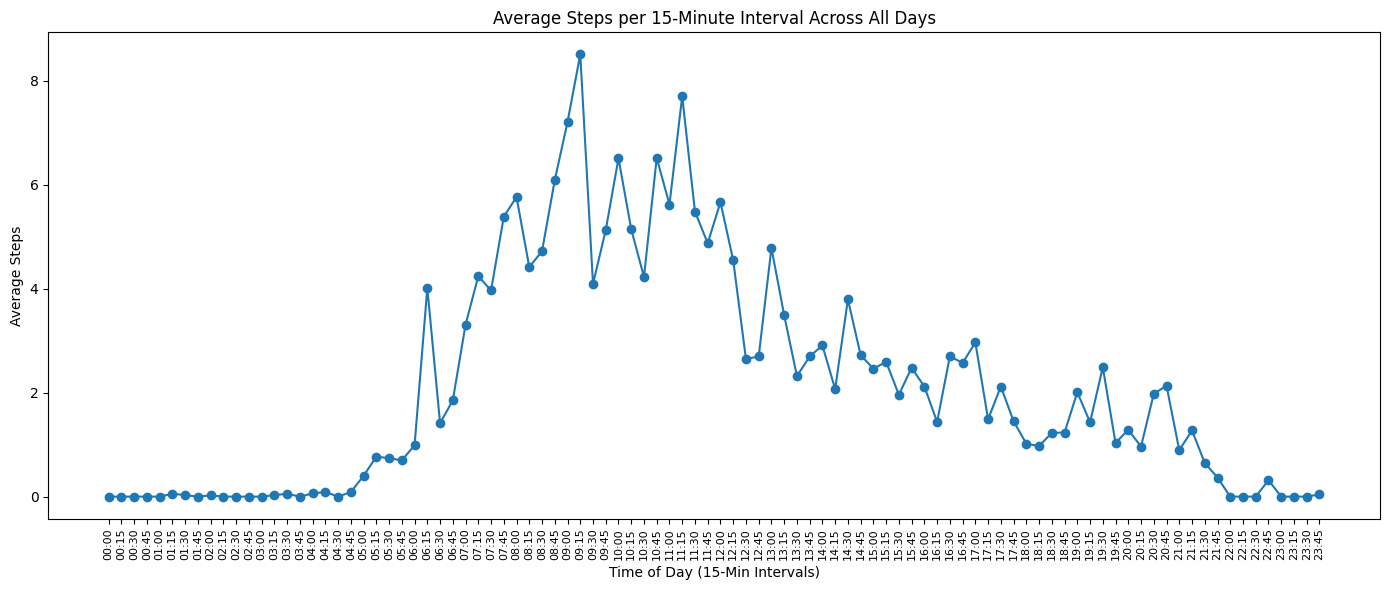

In [63]:
# Round datetime to 15-minute intervals
df['Time_15min'] = df['Datetime'].dt.floor('15min')

# Extract time-of-day component as string for labeling
df['Time_str'] = df['Time_15min'].dt.strftime('%H:%M')

# Group by time-of-day string and compute mean steps
avg_by_interval = df.groupby('Time_str')['Steps'].mean().reset_index()

# create plot
plt.figure(figsize=(14, 6))
plt.plot(avg_by_interval['Time_str'], avg_by_interval['Steps'], marker='o')
plt.xlabel('Time of Day (15-Min Intervals)')
plt.ylabel('Average Steps')
plt.title('Average Steps per 15-Minute Interval Across All Days')
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()



5. For each day represented in the dataset, what is the percentage of minutes without records (missing records)? Please calculate and present this data

In [64]:
# Count unique timestamps per day
minutes_per_day = df.groupby('Date').size().reset_index(name='Recorded_Minutes')

# Total expected minutes in a full day
total_min = 1440

# Calculate percentage of missing minutes
minutes_per_day['Missing_Percentage'] = ((1 - (minutes_per_day['Recorded_Minutes'] / total_min)) * 100).round(2)

# Display the results
print(minutes_per_day)


          Date  Recorded_Minutes  Missing_Percentage
0   2016-06-22               844               41.39
1   2016-06-23              1440                0.00
2   2016-06-24              1440                0.00
3   2016-06-25              1440                0.00
4   2016-06-26              1440                0.00
5   2016-06-27              1439                0.07
6   2016-06-28              1440                0.00
7   2016-06-29              1440                0.00
8   2016-06-30              1440                0.00
9   2016-07-01              1440                0.00
10  2016-07-02              1440                0.00
11  2016-07-03              1440                0.00
12  2016-07-04              1440                0.00
13  2016-07-05              1440                0.00
14  2016-07-06              1440                0.00
15  2016-07-07              1440                0.00
16  2016-07-08              1440                0.00
17  2016-07-09              1440              

6. For minutes with missing data, fill in 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories' using the mean values for those minutes across all days where data is available. Save the completed dataset to a DataFrame named `all_activity_df` with columns for 'Datetime', 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories'.


In [68]:
# identify which columns need to be filled
cols_to_fill = ['Steps', 'XCnt', 'YCnt', 'ZCnt', 'Calories']

# compute the mean values for each minute
minute_means = df.groupby('Time')[cols_to_fill].mean()

# function to fill missing values using minute-wise mean
def fill_missing_values(row):
    if row[cols_to_fill].isnull().any():
        time_key = row['Time']
        for col in cols_to_fill:
            if pd.isna(row[col]):
                row[col] = minute_means.loc[time_key, col]
    return row

# apply the function to fill missing values and create final DF
df_filled = df.apply(fill_missing_values, axis=1)
all_activity_df = df_filled[['Datetime', 'Steps', 'XCnt', 'YCnt', 'ZCnt', 'Calories']].copy()

print(all_activity_df.isnull().sum())

Datetime    0
Steps       0
XCnt        0
YCnt        0
ZCnt        0
Calories    0
dtype: int64


7. Could you create plots that illustrate the pairwise relationships between 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories'? After analyzing these plots, what conclusions can you draw about the relationships and potential correlations between these variables?

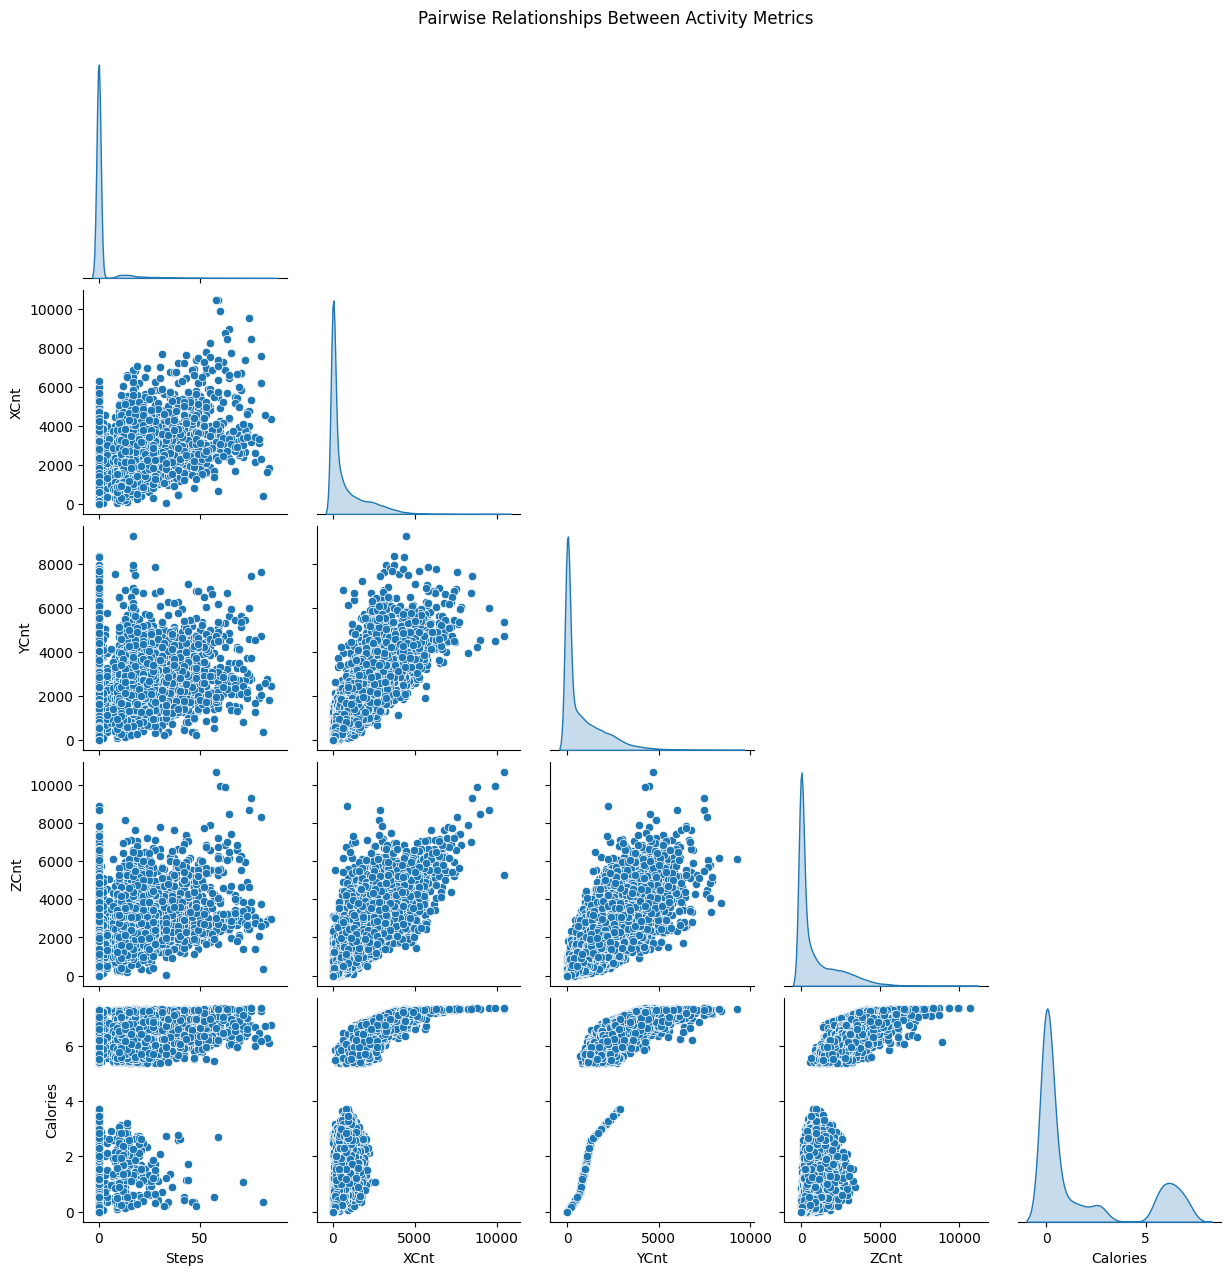

In [33]:
# select on only the relevant columns
activity_vars = all_activity_df[['Steps', 'XCnt', 'YCnt', 'ZCnt', 'Calories']]

# drop missing values (NA)
activity_vars = activity_vars.dropna()

# create pairplot
sns.pairplot(activity_vars, diag_kind='kde', corner=True)
plt.suptitle("Pairwise Relationships Between Activity Metrics", y=1.02)
plt.show()


**The pairwise relationship plots reveals a few key insights. First, there is a strong positive correlation among the count variables and step variables, which suggests that step counts and accelerometer-based metrics go hand in hand when measuring physical activity. However, Calories seems to have weaker correlations with the other metrics. Most variable distributions are right-skewed, with lower activity levels dominating with very few high-activity outliers. The diagonal histograms and scatter plots show that while some redundancy exists across measures, each provides unique information, reinforcing the value of using multiple metrics for a fuller understanding of physical activity.**